In [1]:
import sys
sys.path.append('../')
import numpy as np

from solidpy import *

FileNotFoundError: [Errno 2] No such file or directory: 'data/burnrate/simulated/KNSB_Leviata_sim.csv'

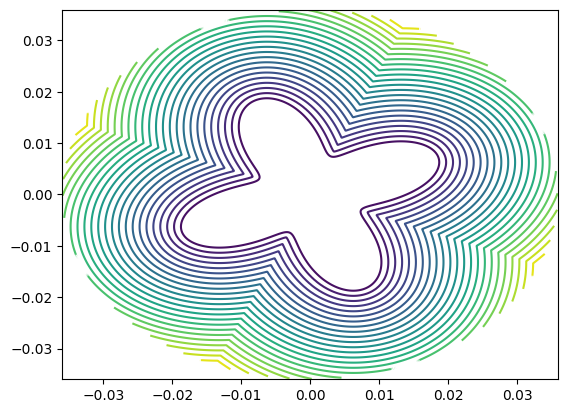

In [2]:
from solidpy.BurnEmpirical import EmpiricalExport


Grao_Leviata = Bates(
        outer_radius=71.92 / 2000,
        inner_radius=31.92 / 2000,
    )
Star_Test = Star(
    outer_radius=71.92 / 2000,
    star_maximum=(71.92 / 2000) / 3 * (5 / 3),
    star_minimum=(71.92 / 2000) / 9 * 2,
    star_points=4,
)
Leviata = Motor(
    Star_Test,
    grain_number=4,
    chamber_inner_radius=77.92 / 2000,
    nozzle_throat_radius=17.5 / 2000,
    nozzle_exit_radius=44.44 / 2000,
    nozzle_angle=15 * np.pi / 180,
    chamber_length=600 / 1000,
)
KNSB = Propellant(
    specific_heat_ratio=1.1361,
    density=1700,
    products_molecular_mass=39.9e-3,
    combustion_temperature=1600,
    # burn_rate_a=5.13,
    # burn_rate_n=0.22,
    interpolation_list="../data/burnrate/KNSB.csv",
)

Ambient = Environment(latitude=-0.38390456, altitude=627, ellipsoidal_model=True)

"""Static-fire data"""

data_path = "../data/static_fires/leviata_final_curve.csv"
ext_data = np.loadtxt(
    data_path,
    delimiter=",",
    unpack=True,
    skiprows=1,
)

Empirical_Simulation = BurnEmpirical(
    Leviata, KNSB, environment=Ambient, empirical_data=ext_data
)
ExportPlot = EmpiricalExport(Empirical_Simulation)

ExportPlot.all_info()
ExportPlot.plotting()